# Pose
This notebook tries to introduce to pose representation using Robopy (python implementation of Peter Corke's Robotics Toolbox)
First, make sure that you have all dependencies installed.

In [1]:
!pip install roboticstoolbox-python

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


Let's import dependencies.
robopy.base.pose - class to deal with pose in 2D and 3D
math -  just to have math constant pi

In [2]:
from numpy import pi
from spatialmath import SO2, SE2

## 2D Pose
There's two groups of transformations in 2D:
- SO2: the ortonormal transformations (rotation around Z-axis)
- SE2: the euclidean homogeneous transformations (translation and rotation around Z-axis)

### SO2 
For SO2 transformations are 2x2 rotation matrices
$$ \left[ \begin{array}{cc} \cos \theta & -\sin\theta \\ \sin\theta & \cos\theta \end{array} \right] $$

In [3]:
# A rotation matrix
A = SO2.Rand()

print(A)
# The angle of rotation (in radians)
print(A.theta())


   0.157959    0.987446     
  -0.987446    0.157959     

-1.4121734424967791


A composition is matrix multiplication, be careful with the matrix order.

In [4]:
# Another rotation matrix
B = SO2.Rand()
print(B)
print(B.theta())

# The composition of the transformations (here, the first transformation is B)
C = A*B
print(C)
print(C.theta())
# The composition is the sum of two angles, hence it should be the same (unless it has more than 1 pi)
print(A.theta()+B.theta())
print((A.theta()+B.theta())%pi)

  -0.619004    0.785387     
  -0.785387   -0.619004     

-2.2382708086555962
  -0.873305   -0.487175     
   0.487175   -0.873305     

2.632741056027211
-3.6504442511523756
2.6327410560272106


The rotation matrices are ortonormal, i.e.,
$ R^T = R^{-1} $ and $\det R = 1 $

In [5]:
# Let's see the transpose of the numpy matrix (when only one pose, we can get the numpy matrix with property A)
print(A.A.T)

# Let's see the inverse of the rotation matrix
print(A.inv())
I=A*A.inv()
print(I)

# Finally, get the determinant of A
print(A.det())

[[ 0.15795853 -0.98744575]
 [ 0.98744575  0.15795853]]
   0.157959   -0.987446     
   0.987446    0.157959     

   1           0            
   0           1            

0.9999999999999999


### SE2
SE2 integrates a rotation followed by a translation, a transformation is represented with a matrix with homogeneous coordinates
$$ \left[ \begin{array}{ccc} \cos \theta & -\sin$\theta & t_x \\ \sin$\theta & \cos$\theta & t_y \\ 0 & 0 & 1 \end{array} \right] $$

In [6]:
# A SE transformation
A2 = SE2.Rand()
print(A2)
# Its angle of rotation
print(A2.theta())
# Its translation
print(A2.t)

   0.999505   -0.0314735   0.0722183    
   0.0314735   0.999505    0.641264     
   0           0           1            

0.03147870292154065
[0.07221828 0.64126391]


In [7]:
print(A2.inv())

   0.999505    0.0314735  -0.0923653    
  -0.0314735   0.999505   -0.638673     
   0           0           1            



In [8]:
# only one parameter assume it is theta
rot = SE2(A2.theta())

#two parameters assume they are x, y
t = SE2(A2.t[0], A2.t[1])
print(rot)
print(t)

tR = t*rot
print(tR == A2)
Rt = rot*t
print(Rt == A2)

   0.999505   -0.0314735   0            
   0.0314735   0.999505    0            
   0           0           1            

   1           0           0.0722183    
   0           1           0.641264     
   0           0           1            

True
False


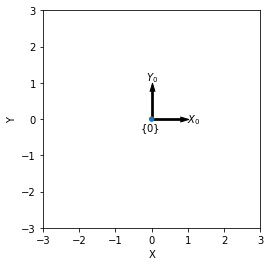

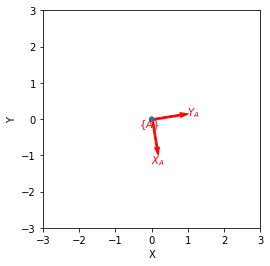

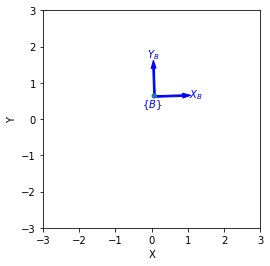

In [9]:
import matplotlib.pyplot as plt
plt.figure() # create a new figure
SE2().plot(frame='0', dims=[-3,3], color='black')
A.plot(frame='A',dims=[-3,3], color='red')
A2.plot(frame='B',dims=[-3,3], color='blue')
plt.show()